# Softmax Regression Regression Example 

Imports:

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

sys.path.append(str(Path().resolve().parent))

from models.LogisticRegression import SoftMaxRegression
from GLMTrainer import GLMTrainer
from optimizers.SGDOptimizer import SGDOptimizer
from loss.CrossEntropyLoss import CategoricalCrossEntropyLoss

Generate some data: (You may want to use custom data here)

In [2]:
x = np.random.rand(30, 2) # generate random features with 2 examples
xRand = x + 0.1 * (np.random.rand(30, 2) - 0.5)
y = [0 if (point[0] >= point[1]) and (point[1] <= -point[0] + 1) else 1 if (point[1] > point[0]) and (point[0] <= 0.5) else 2 for point in xRand]
x, y

(array([[0.00338301, 0.24079319],
        [0.40472516, 0.47418044],
        [0.40313333, 0.01725049],
        [0.81889119, 0.42666973],
        [0.28764729, 0.21914585],
        [0.48095519, 0.02853543],
        [0.01347702, 0.25256393],
        [0.96863272, 0.85646371],
        [0.56880943, 0.21852293],
        [0.36427078, 0.8128593 ],
        [0.48331824, 0.71133508],
        [0.22696141, 0.36394332],
        [0.43120736, 0.79805054],
        [0.74843947, 0.43199647],
        [0.76608693, 0.46545784],
        [0.25202981, 0.38332844],
        [0.43014882, 0.48783096],
        [0.76173792, 0.05438307],
        [0.39708316, 0.33773335],
        [0.31958609, 0.71812746],
        [0.41404263, 0.33949033],
        [0.05878275, 0.87978149],
        [0.19966218, 0.54203104],
        [0.70023554, 0.41408928],
        [0.16995736, 0.56148949],
        [0.10083835, 0.91530861],
        [0.36439118, 0.92950474],
        [0.4032403 , 0.4225724 ],
        [0.40155523, 0.13072444],
        [0.235

Plot our data to see it:

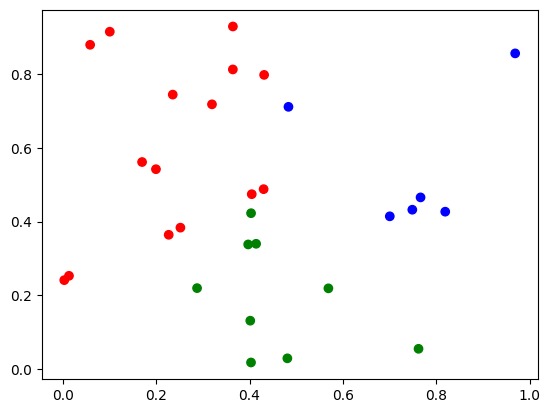

In [3]:
fig, ax = plt.subplots()
colors = np.array(['red' if point == 1 else 'blue' if point == 2 else 'green' for point in y])
ax.scatter(x[:, 0], x[:, 1], c=colors)
plt.show()

Let's initialize our model, loss and optimizer

In [4]:
model = SoftMaxRegression(2, 3, [0, 1, 2])
optimizer = SGDOptimizer(0.1)
loss = CategoricalCrossEntropyLoss()

trainer = GLMTrainer(model, loss, optimizer)

Let's train our model:

In [5]:
trainer.train(x, y, 500)

Epoch: 1
Loss: 35.0304643446444
Epoch: 2
Loss: 30.119926427307075
Epoch: 3
Loss: 27.86859874545029
Epoch: 4
Loss: 26.203184831195262
Epoch: 5
Loss: 24.84141784663162
Epoch: 6
Loss: 23.680464746744608
Epoch: 7
Loss: 22.667995693351177
Epoch: 8
Loss: 21.773114137701633
Epoch: 9
Loss: 20.975174909042334
Epoch: 10
Loss: 20.25880715071273
Epoch: 11
Loss: 19.611939011218812
Epoch: 12
Loss: 19.024782381154644
Epoch: 13
Loss: 18.489288751445127
Epoch: 14
Loss: 17.998778188814615
Epoch: 15
Loss: 17.54766513933156
Epoch: 16
Loss: 17.131246805198835
Epoch: 17
Loss: 16.745537497853714
Epoch: 18
Loss: 16.387138200838443
Epoch: 19
Loss: 16.053133156944593
Epoch: 20
Loss: 15.741007355717471
Epoch: 21
Loss: 15.448580244115227
Epoch: 22
Loss: 15.173952107407242
Epoch: 23
Loss: 14.915460407531262
Epoch: 24
Loss: 14.671643999156496
Epoch: 25
Loss: 14.441213619906103
Epoch: 26
Loss: 14.223027410761091
Epoch: 27
Loss: 14.016070495373047
Epoch: 28
Loss: 13.819437854967216
Epoch: 29
Loss: 13.63231989504102
E

Let's plot the decision boundary

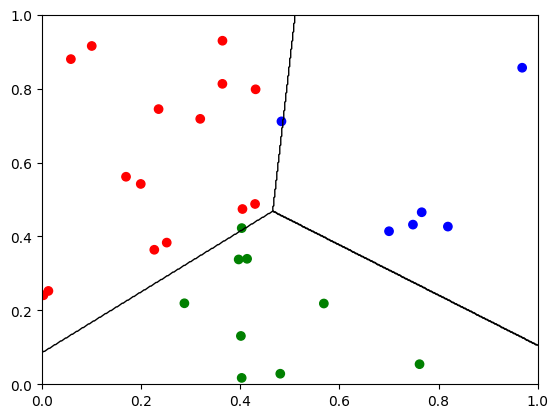

In [6]:
x1, x2 = np.meshgrid(np.linspace(0, 1, 500), 
                     np.linspace(0, 1, 500))
grid_points = np.c_[x1.ravel(), x2.ravel()]
probs = model(grid_points)
predicted_classes = np.argmax(probs, axis=1).reshape(x1.shape)
plt.contour(x1, x2, predicted_classes, levels=np.arange(0, 4) - 0.5, colors='k', linewidths=1)
plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.show()

This plot is of the model's decision boundary. As you can see it very closely seperates the points into there respective classes. 